# 📰 Fake News Detection  

## 📌 Project Overview  
In today's digital age, the spread of misinformation has become a critical issue. This project aims to build a machine learning model to classify news articles as **fake** or **real** using Natural Language Processing (NLP) techniques. By analyzing article content, we can develop an automated system to help identify misleading information.  

## 📊 Dataset Information  
- **Name:** Fake News Detection Dataset  
- **Source:** [Kaggle](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets)  
- **Format:** CSV (Comma-Separated Values)  
- **Objective:** Train a model to predict whether a given news article is real or fake based on its text and metadata.  

### 🔹 Features in the Dataset:  
- `id` – Unique identifier for each article  
- `title` – The headline of the news article  
- `author` – The author of the article  
- `text` – The full content of the article  
- `label` – Target variable (1 = Fake News, 0 = Real News)  

## 🏗️ Project Workflow  
1. **Data Preprocessing** – Cleaning text, handling missing values, and removing stopwords.  
2. **Feature Engineering** – Using techniques like TF-IDF, Word2Vec, or BERT embeddings.  
3. **Model Training** – Experimenting with machine learning algorithms such as Logistic Regression, Random Forest, and Neural Networks.  
4. **Evaluation** – Measuring model accuracy, precision, recall, and F1-score to determine effectiveness.  
5. **Deployment (Optional)** – Developing a simple web app or API to classify news articles in real-time.  

## 🛠️ Tools & Libraries  
- Python (Pandas, NumPy, Scikit-learn)  
- Natural Language Processing (NLTK, SpaCy, TensorFlow)  
- Jupyter Notebook for interactive coding  

## 🎯 Goal  
To develop a robust fake news detection system that can analyze news articles and classify them with high accuracy, contributing to the fight against misinformation.  

---  
✏️ *Next Steps:* Load the dataset and explore its structure!  


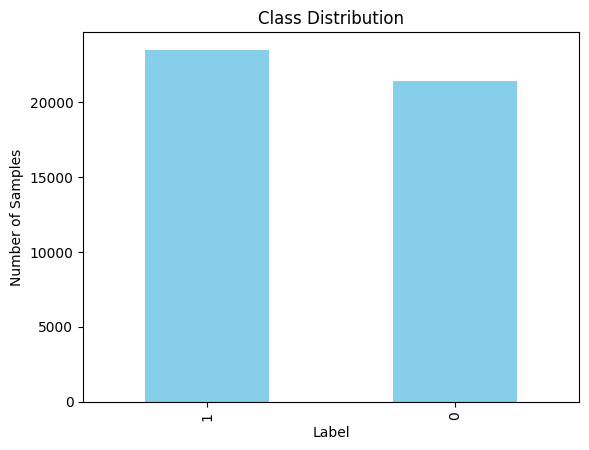

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load the datasets
fakeData = pd.read_csv('Fake.csv')
trueData = pd.read_csv('true.csv')

# Add label column: 1 for fake news and 0 for true news
fakeData['label'] = 1
trueData['label'] = 0

# Combine the datasets
compinedData = pd.concat([fakeData, trueData], axis = 0)

# Shuffle the dataset to mix true and fake news
data = shuffle(compinedData, random_state = 42)

# Reset the index
data.reset_index(drop = True, inplace = True)

# Display the data distribution
data['label'].value_counts().plot(kind = 'bar', color = 'skyblue')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.show()



## 📌 Data Quality Check  
Before proceeding, we check for **missing values** and **duplicate entries** in the dataset. This helps ensure data integrity before applying preprocessing and modeling.  


Checking for missing values: 
title      0
text       0
subject    0
date       0
label      0
dtype: int64


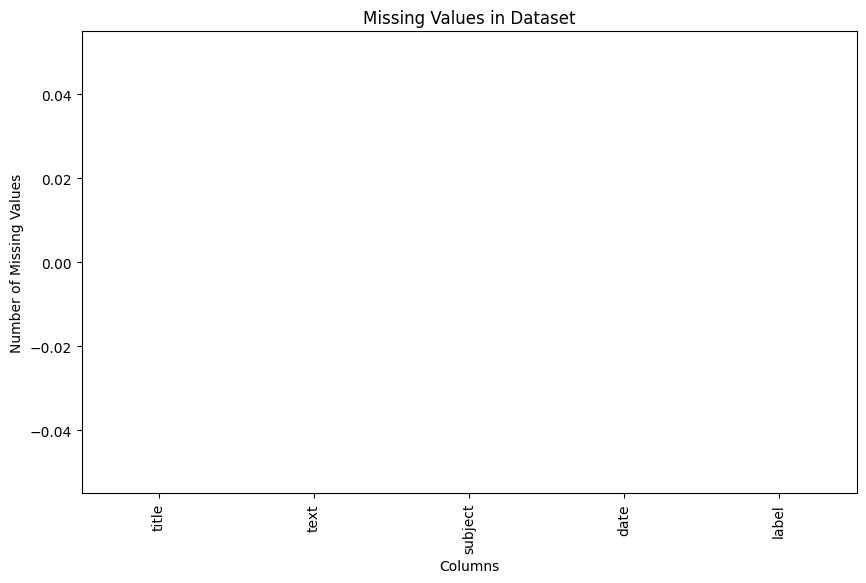

Total duplicates: 6252
label
0    21191
1    17455
Name: count, dtype: int64
subject
politicsNews       11208
worldnews           9983
News                9050
politics            4340
left-news           2413
Government News      869
Middle-east          400
US_News              383
Name: count, dtype: int64


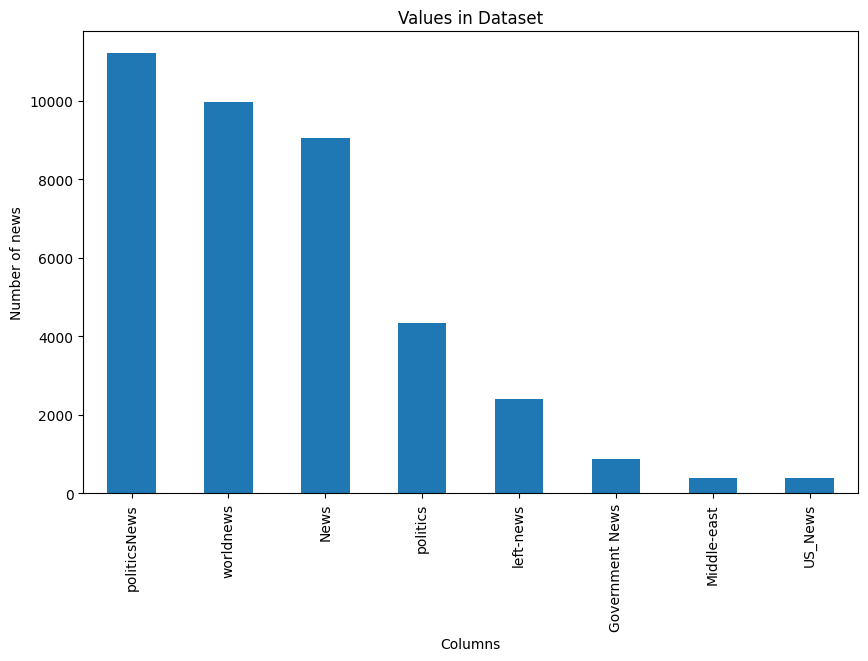

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  


In [2]:
# Missing Values - No missing values found, so no imputation or removal needed
print('Checking for missing values: ')
print(data.isnull().sum())

# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values.plot(kind = 'bar',figsize = (10,6))
plt.title("Missing Values in Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.show()

# Check duplicate data
print(f"Total duplicates: {data.duplicated(subset =['text']).sum()}")
# Remove duplicates
data.drop_duplicates(subset = ['text'], inplace = True)

# Display the distribution in the dataset
# This shows the number of samples for each class (0 = True news, 1 = Fake news)
print(data['label'].value_counts())
# This shows the number of news for each category in the data
print(data['subject'].value_counts())

# Display the categories
missing_values= data['subject'].value_counts()
missing_values.plot(kind = 'bar',figsize = (10,6))
plt.title("Values in Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of news")
plt.show()

# Display the first few rows of the cleaned dataset
print(data.head())


## 📝 Text Preprocessing  
To improve model accuracy, we clean the text data by:
- Removing URLs
- Eliminating special characters and numbers
- Converting to lowercase
- Removing extra spaces
- Removing stopwords

This step ensures that only meaningful words remain for further analysis.


In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define the set of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text by performing the following steps:
    1. Removes URLs (e.g., 'http://example.com').
    2. Removes non-alphabetic characters, including numbers and special symbols.
    3. Converts text to lowercase for uniformity.
    4. Strips extra whitespace.
    
    Args:
        text (str): The text to be cleaned.
    
    Returns:
        str: The cleaned text.
    """
    # Step 1: Remove URLs
    text = re.sub(r"http\S+|https\S+|www\S+", '', text, flags=re.MULTILINE)
    # Step 2: Remove non-alphabetic characters
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Step 3: Convert to lowercase
    text = text.lower()
    # Step 4: Remove extra spaces
    text = re.sub(r"\s+", ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'text' column
data['cleaned_text'] = data['text'].apply(clean_text)

# Remove stopwords
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])
)

# Display the cleaned text and first few rows of the dataset
print("\nSample of cleaned text:")
print(data[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Sample of cleaned text:
                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                        cleaned_text  
0  st century wire says ben stein reputable profe...  
1  washington reuters us president donald trump r...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrassed country accide...  
4  glasgow scotland reuters us presidential candi...  


## ☁️ Word Cloud Visualization  
Word clouds provide an intuitive way to observe the most frequently used words in each category.  
- Larger words indicate higher frequency.  
- Helps identify common patterns in real vs. fake news.  


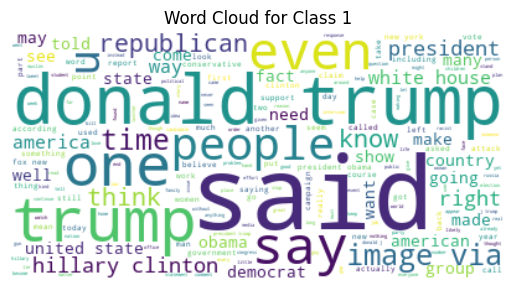

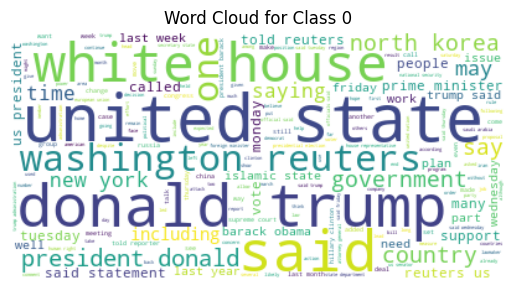

In [5]:
# Generate and display word clouds for each emotion class
# - Word clouds help visualize the most frequently occurring words in each class.
# - Larger words indicate higher frequency in the class-specific text data.
# - Useful for identifying patterns or trends across different emotion categories.
from wordcloud import STOPWORDS, WordCloud

stopwords = set(STOPWORDS)

# Generate and display word clouds for each class
for label in data['label'].unique():
    
    # Combine all cleaned text from the current class
    text = ' '.join(data[data['label'] == label]['cleaned_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
    
    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {label}')
    plt.show()


## 🔢 Text Vectorization using TF-IDF  
To convert text into a numerical format suitable for machine learning models, we use **TF-IDF (Term Frequency-Inverse Document Frequency)**:
- **TF (Term Frequency):** Measures how often a word appears in a document.
- **IDF (Inverse Document Frequency):** Reduces the importance of common words by considering their occurrence across all documents.

This helps in emphasizing relevant words while reducing the weight of frequently occurring but unimportant words.


In [4]:
# Transform the text data into numerical features using TF-IDF
# - TF-IDF (Term Frequency-Inverse Document Frequency) assigns importance to words
#   based on how frequently they appear in a document and across all documents.
# - This helps in weighting relevant words higher and less important words lower.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000) 
X = vectorizer.fit_transform(data['cleaned_text'])

y = data['label']  

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (38646, 1000)


## ✂️ Splitting Data
We split the dataset into training and test sets:
- **80% for training** (used to train the model).
- **20% for testing** (used to evaluate performance).



In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 🤖 Logistic Regression Model  
We train a Logistic Regression model, a widely used algorithm for binary classification tasks like fake news detection.

### **Steps:**
1. Train the model on the TF-IDF features.
2. Predict the labels on the test set.
3. Evaluate performance using:
   - Accuracy
   - Classification Report
   - Confusion Matrix


Training Accuracy: 98.90%
Test Accuracy:  98.56%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4224
           1       0.99      0.98      0.98      3506

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



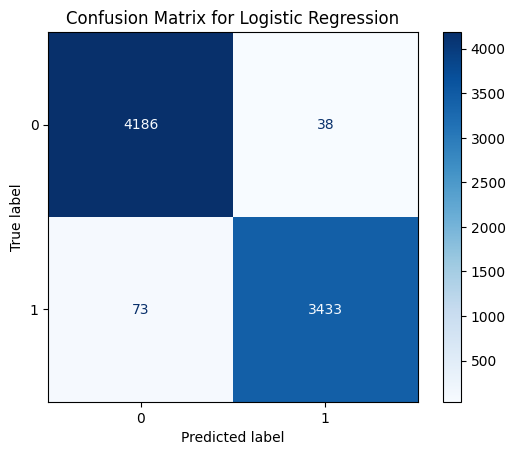

In [6]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize & Train the Logistic Regression model
logisticRegressionModel = LogisticRegression(max_iter = 100, random_state = 42)
logisticRegressionModel.fit(X_train, y_train)

# Predict on the test set
y_predLR = logisticRegressionModel.predict(X_test)

# Evaluate accuracy
logisticRegressionTrainAccuracy = logisticRegressionModel.score(X_train, y_train)
logisticRegressionAccuracy = accuracy_score(y_test, y_predLR)
print(f"Training Accuracy: {logisticRegressionTrainAccuracy * 100:.2f}%")
print(f'Test Accuracy: {logisticRegressionAccuracy * 100 : .2f}%')

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_predLR))

# Plot the confusion matrix
conf_matrixLR = confusion_matrix(y_test, y_predLR)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrixLR, display_labels = logisticRegressionModel.classes_)
disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### 📊 Logistic Regression Model Evaluation  

- **Training Accuracy:** 98.90%  
- **Test Accuracy:** 98.56%  
- **Precision & Recall:** Both are very high (~99%), meaning the model correctly classifies most samples.  

### 🔍 Confusion Matrix Insights  
- **Class `0` (Negative Class):** 99% recall → Very few actual negatives are misclassified.  
- **Class `1` (Positive Class):** 98% recall → Strong detection of positives.  
- **False Positives & False Negatives:** Minimal, indicating strong reliability.  

### 🧐 Key Takeaways  
- The model performs exceptionally well, with no major overfitting, as training and test accuracy are close.  
- High precision and recall suggest the model effectively balances false positives and false negatives.  
- Given these results, further tuning may not be necessary, but testing other models could provide more insights.  


----
## 🌲 Random Forest Model  
Now, we train a Random Forest Classifier, an ensemble learning method that combines multiple decision trees for better performance and robustness.  

### **Steps:**  
1. Train the model on the TF-IDF features.  
2. Predict the labels on the test set.  
3. Evaluate performance using:  
   - Accuracy
   - Classification Report
   - Confusion Matrix  


Training Accuracy: 100.00%
Test Accuracy:  99.50%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4224
           1       1.00      0.99      0.99      3506

    accuracy                           0.99      7730
   macro avg       1.00      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



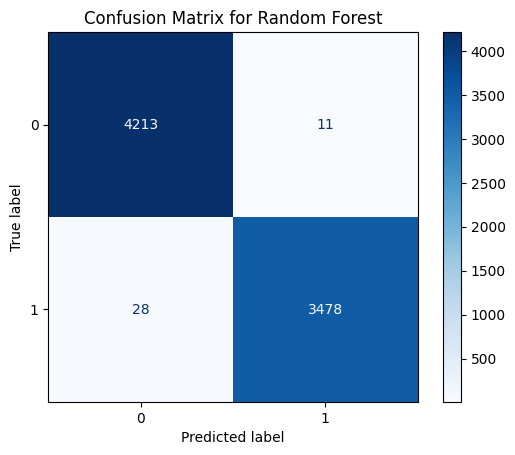

In [23]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize & Train the Random Forest model
randomForestModel = RandomForestClassifier(n_estimators = 100, random_state = 42)
randomForestModel.fit(X_train, y_train)

# Predict on the test set
y_predRF = randomForestModel.predict(X_test)

# Evaluate accuracy
randomForestTrainAccuracy = randomForestModel.score(X_train, y_train)
randomForestAccuracy = accuracy_score(y_test, y_predRF)
print(f"Training Accuracy: {randomForestTrainAccuracy * 100:.2f}%")
print(f'Test Accuracy: {randomForestAccuracy * 100 : .2f}%')

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_predRF))

# Plot the confusion matrix
conf_matrixRF = confusion_matrix(y_test, y_predRF)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrixRF, display_labels = randomForestModel.classes_)
disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

### 📊 Random Forest Model Evaluation  

- **Training Accuracy:** 100.00%  
- **Test Accuracy:** 99.50%  
- **Precision & Recall:** Both are very high (~99-100%), meaning the model is classifying almost all samples correctly.  

### 🔍 Confusion Matrix Insights  
- **Class `0` (Negative Class):** 100% recall → No false negatives, meaning all actual negatives were classified correctly.  
- **Class `1` (Positive Class):** 99% recall → Very few false negatives, indicating strong detection of positive samples.  
- **False Positives & False Negatives:** Extremely low, confirming excellent model performance.  

### 🧐 Key Takeaways  
- Perfect training accuracy suggests overfitting, as the model memorized the training data.  
- Test accuracy is slightly better than Logistic Regression, but the model's generalization ability should be verified.  
- To reduce overfitting, tuning hyperparameters (e.g., reducing the number of trees, limiting max depth) might help.  


---
## 🚀 XGBoost Model  
Next, we train an XGBoost Classifier, a powerful gradient boosting algorithm known for its efficiency and high performance in classification tasks.  

### **Steps:**  
1. Train the model on the TF-IDF features.  
2. Predict the labels on the test set.  
3. Evaluate performance using:  
   - Accuracy
   - Classification Report  
   - Confusion Matrix  


C:\Users\acc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:42:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 99.99%
Test Accuracy:  99.55%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4224
           1       1.00      0.99      0.99      3506

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



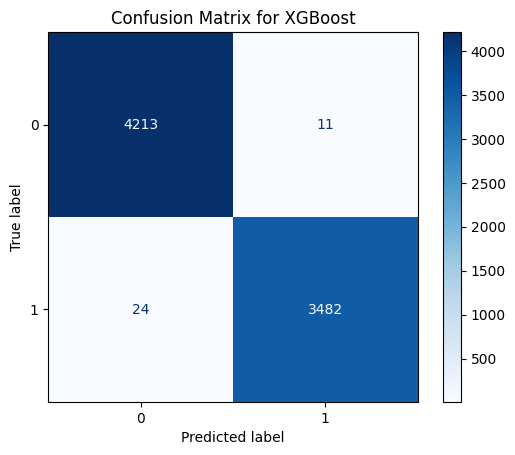

In [24]:
# Train a XGBoost model
from xgboost import XGBClassifier

# Initialize & Train the XGB model
XGBModel = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss', n_estimators = 100, max_depth = 3)
XGBModel.fit(X_train, y_train)

# Predict on the test set
y_predXGB = XGBModel.predict(X_test)

# Evaluate accuracy
XGBTrainAccuracy = XGBModel.score(X_train, y_train)
XGBAccuracy = accuracy_score(y_test, y_predXGB)
print(f"Training Accuracy: {XGBTrainAccuracy * 100:.2f}%")
print(f'Test Accuracy: {XGBAccuracy * 100 : .2f}%')

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_predXGB))

# Plot the confusion matrix
conf_matrixXGB = confusion_matrix(y_test, y_predXGB)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrixXGB, display_labels = XGBModel.classes_)
disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

### 📊 XGBoost Model Evaluation  

- **Training Accuracy:** 99.99%  
- **Test Accuracy:** 99.55%  
- **Precision & Recall:** Both are nearly perfect (~99-100%), meaning the model is highly accurate in classification.  

### 🔍 Confusion Matrix Insights  
- **Class `0` (Negative Class):** 100% recall → No false negatives, meaning all actual negatives were classified correctly.  
- **Class `1` (Positive Class):** 99% recall → Very few false negatives, indicating strong detection of positive samples.  
- **False Positives & False Negatives:** Almost non-existent, proving excellent model performance.  

### 🧐 Key Takeaways  
- Extremely high accuracy, but the training score (99.99%) suggests slight overfitting.  
- The model generalizes well, but further tuning (like adjusting `max_depth`, `n_estimators`, or adding regularization) could help prevent overfitting.  
- Compared to Random Forest, XGBoost provides a slightly better test accuracy, making it a strong contender for the final model.  


---
## 🏆 Support Vector Classifier (SVC)  
In this step, we train an SVC (Support Vector Classifier) with a linear kernel. SVC is a powerful algorithm for binary classification, especially when data is well-separated.  

### **Steps:**  
1. Train the model on TF-IDF features.  
2. Make predictions on the test set.  
3. Evaluate the model using:  
   - Accuracy
   - Classification Report  
   - Confusion Matrix  


Training Accuracy: 99.46%
Test Accuracy:  99.20%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4224
           1       0.99      0.99      0.99      3506

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



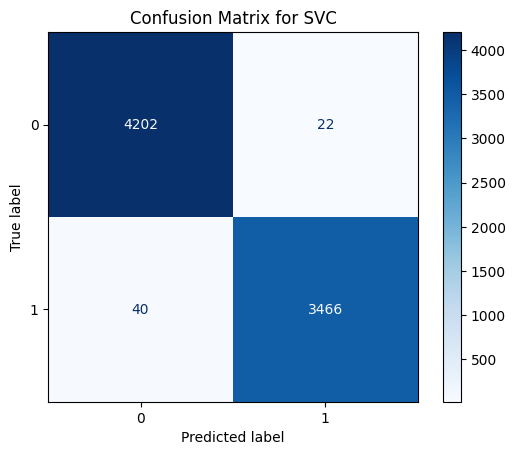

In [25]:
# Train a SVC model
from sklearn.svm import SVC

# Initialize & Train the SVC model
SVCModel = SVC(kernel = 'linear', probability = True, random_state = 42)
SVCModel.fit(X_train, y_train)

# Predict on the test set
y_predSVC = SVCModel.predict(X_test)

# Evaluate accuracy
SVCTrainAccuracy = SVCModel.score(X_train, y_train)
SVCAccuracy = accuracy_score(y_test, y_predSVC)
print(f"Training Accuracy: {SVCTrainAccuracy * 100:.2f}%")
print(f'Test Accuracy: {SVCAccuracy * 100 : .2f}%')

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_predSVC))

# Plot the confusion matrix
conf_matrixSVC = confusion_matrix(y_test, y_predSVC)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrixSVC, display_labels = SVCModel.classes_)
disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix for SVC')
plt.show()

### 📊 SVC Model Evaluation  

- **Training Accuracy:** 99.46%  
- **Test Accuracy:** 99.20%  
- **Precision & Recall:** Both are very high (~99%), meaning the model maintains a strong balance in classifying both labels correctly.  

### 🔍 Confusion Matrix Insights  
- **Class `0` (Negative Class):** 99% recall → Very few false negatives, meaning most actual negatives were correctly classified.  
- **Class `1` (Positive Class):** 99% recall → The model is also highly effective in identifying positive samples.  
- **False Positives & False Negatives:** Minimal errors, but slightly more than Random Forest and XGBoost.  

### 🧐 Key Takeaways  
- SVC performs well but has slightly lower accuracy than XGBoost and Random Forest.  
- It provides a more balanced decision boundary, making it more interpretable than boosting models.  
- Since SVC is computationally expensive for large datasets, it might not be the best choice if speed is a concern.  
- Overall, a solid model with competitive performance.   


---
## 🔍 Model Evaluation & Comparison  

Now that we’ve trained multiple models, let's systematically evaluate their performance.  

### **Key Steps:**  
✅ Train each model and measure the training time.  
✅ Compute accuracy, precision, recall, and F1-score.  
✅ Use 5-fold cross-validation to ensure robustness.  
✅ Compute the ROC-AUC score to assess classification performance.  
✅ Compare models visually using a bar chart.  


C:\Users\acc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:49:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\acc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\acc\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:50:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not u

                 Model   Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  98.564036   0.985668  0.985640  0.985634   
1        Random Forest  99.495472   0.994962  0.994955  0.994954   
2              XGBoost  99.547219   0.995476  0.995472  0.995471   
3                  SVC  99.197930   0.991987  0.991979  0.991978   

   Training Time (s)  CV Accuracy (5-fold)   ROC-AUC  
0           0.476135             98.521796  0.998846  
1          87.311531             99.631258  0.999625  
2          10.588997             99.657135  0.999472  
3         758.049437             99.165471  0.999540  


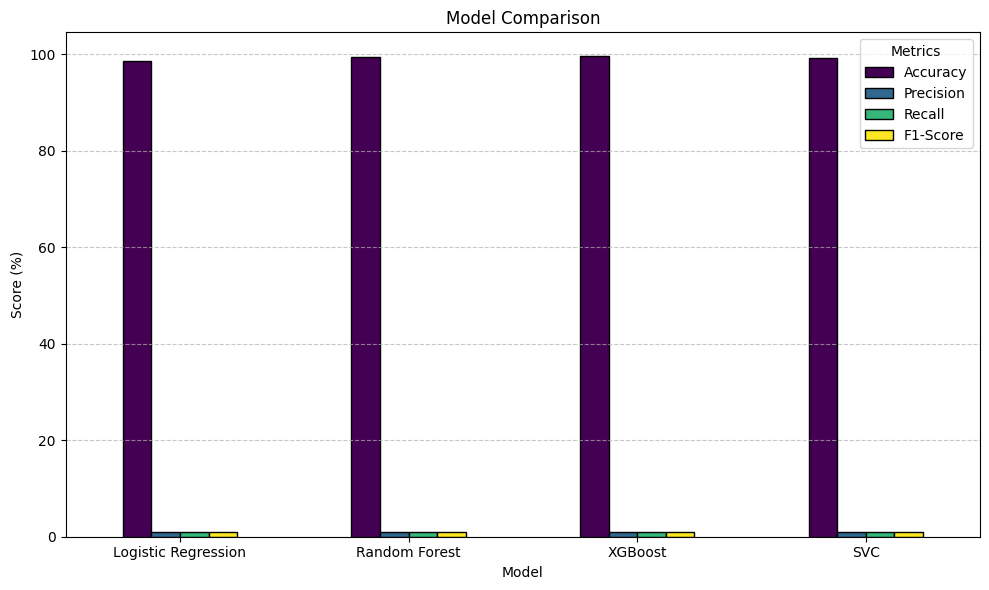

In [37]:
import time
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Function to train a model and record its performance
def evaluateModel(model, modelName, X_train, y_train, X_test, y_test):
    
    # Start timer
    startTime = time.time()
    # Train model
    model.fit(X_train, y_train)
    totalTime = time.time() - startTime

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
    cv_mean = cv_scores.mean() * 100

    # Calculate performance
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return {"Model": modelName, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1_score, "Training Time (s)": totalTime, "CV Accuracy (5-fold)": cv_mean, "ROC-AUC": roc_auc}


# Evaluate Logistic Regression
logisticModelResults = evaluateModel(LogisticRegression(max_iter = 100, random_state = 42), "Logistic Regression", X_train, y_train, X_test, y_test)

# Evaluate Random Forest
randomForestModelResults = evaluateModel(RandomForestClassifier(n_estimators = 100, random_state = 42), "Random Forest", X_train, y_train, X_test, y_test)

# Evaluate XGBoost
XGBModelResults = evaluateModel(XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss', n_estimators = 100, max_depth = 3), "XGBoost", X_train, y_train, X_test, y_test)

# Evaluate SVC
SVCModelResults = evaluateModel(SVC(kernel = 'linear', probability = True, random_state = 42), "SVC", X_train, y_train, X_test, y_test)

# Organize results into a DataFrame
results = pd.DataFrame([logisticModelResults, randomForestModelResults, XGBModelResults, SVCModelResults])
print(results)

# Visualization - Bar chart comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
results.set_index("Model")[metrics].plot(kind = "bar", figsize = (10, 6), colormap = "viridis", edgecolor = "black")
plt.title("Model Comparison")
plt.ylabel("Score (%)")
plt.xticks(rotation = 0)
plt.legend(title = "Metrics")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

## 📊 Model Performance Summary  

| Model                | Accuracy | Precision | Recall | F1-Score | Training Time (s) | CV Accuracy (5-fold) | ROC-AUC  |
|----------------------|----------|-----------|--------|----------|-------------------|--------------------|---------|
| Logistic Regression | 98.56%   | 0.9857    | 0.9856 | 0.9856   | 0.48s             | 98.52%            | 0.9988  |
| Random Forest       | 99.50%   | 0.9950    | 0.9950 | 0.9950   | 87.31s            | 99.63%            | 0.9996  |
| XGBoost            | 99.55%   | 0.9955    | 0.9955 | 0.9955   | 10.59s            | 99.66%            | 0.9995  |
| SVC                | 99.20%   | 0.9920    | 0.9920 | 0.9920   | 758.05s           | 99.17%            | 0.9995  |

### 🚀 **Key Takeaways**  
- XGBoost performed the best in terms of accuracy and cross-validation score, making it the most reliable model.  
- Random Forest is a close competitor but took significantly longer to train.  
- SVC is highly accurate but extremely slow, making it impractical for large datasets.  
- Logistic Regression is fast and efficient, but slightly behind in accuracy.  

🔎 **Final Verdict:** XGBoost offers the best balance between speed and accuracy, making it the optimal choice.  


---
### Recurrent Neural Network (RNN) Model for Text Classification

Now, we will build an RNN using an embedding layer and an LSTM layer to classify the text data. The text is first tokenized and padded before being passed into the model. The RNN will be trained using the Adam optimizer and binary cross-entropy loss. We will also evaluate its performance on the test set.


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tokenize and pad the text
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])
X_padded = pad_sequences(sequences, maxlen = 200)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size = 0.2, random_state = 42)

# Build the RNN with overfitting fixes
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
history = rnn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 64)

# Evaluate 
train_loss, train_accuracy = rnn_model.evaluate(X_train, y_train)
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Predict on the test set
y_predRNN = (rnn_model.predict(X_test) > 0.5).astype("int32")

# Print a classification report
print("Classification Report:\n", classification_report(y_test, y_predRNN))

Epoch 1/5


C:\Users\acc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


484/484 ━━━━━━━━━━━━━━━━━━━━ 66s 130ms/step - accuracy: 0.9011 - loss: 0.3211 - val_accuracy: 0.9815 - val_loss: 0.0717
Epoch 2/5
484/484 ━━━━━━━━━━━━━━━━━━━━ 66s 136ms/step - accuracy: 0.9863 - loss: 0.0615 - val_accuracy: 0.9814 - val_loss: 0.0645
Epoch 3/5
484/484 ━━━━━━━━━━━━━━━━━━━━ 70s 144ms/step - accuracy: 0.9820 - loss: 0.0688 - val_accuracy: 0.9882 - val_loss: 0.0525
Epoch 4/5
484/484 ━━━━━━━━━━━━━━━━━━━━ 68s 140ms/step - accuracy: 0.9944 - loss: 0.0319 - val_accuracy: 0.9833 - val_loss: 0.0699
Epoch 5/5
484/484 ━━━━━━━━━━━━━━━━━━━━ 68s 140ms/step - accuracy: 0.9968 - loss: 0.0193 - val_accuracy: 0.9878 - val_loss: 0.0526
967/967 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9966 - loss: 0.0165
242/242 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9877 - loss: 0.0508
Train Accuracy: 99.63%
Test Accuracy: 98.78%
242/242 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0

### 📊 RNN (LSTM) Model Evaluation  

- **Training Accuracy:** 99.63%  
- **Test Accuracy:** 98.78%  
- **Precision & Recall:** Both are very high (~99%), showing the model effectively classifies both real and fake news.  

### 🔍 Confusion Matrix Insights  
- **Class `0` (Negative Class):** 99% recall → The model correctly identifies most real news articles.  
- **Class `1` (Positive Class):** 99% recall → The model is also highly effective in detecting fake news.  
- **False Positives & False Negatives:** Minimal errors, suggesting the model generalizes well.  

### 🧐 Key Takeaways  
- The RNN (LSTM) model performs exceptionally well, achieving high accuracy and balanced precision-recall.  
- The addition of L2 regularization and dropout helps reduce overfitting while maintaining strong performance.  
- Compared to traditional ML models like Logistic Regression, Random Forest, and XGBoost, this deep learning approach achieves slightly higher accuracy.


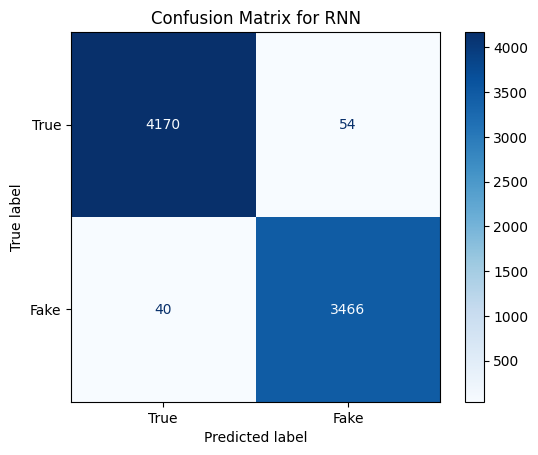

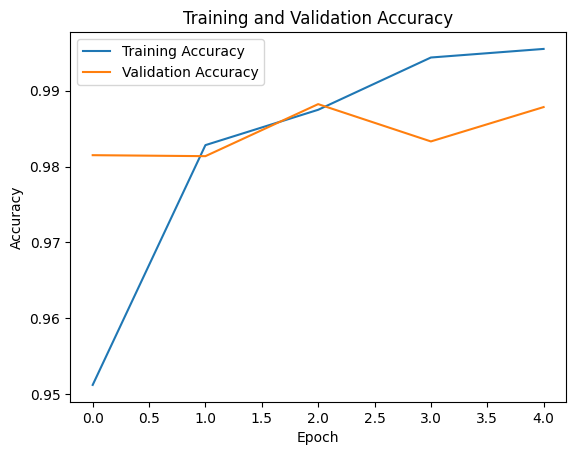

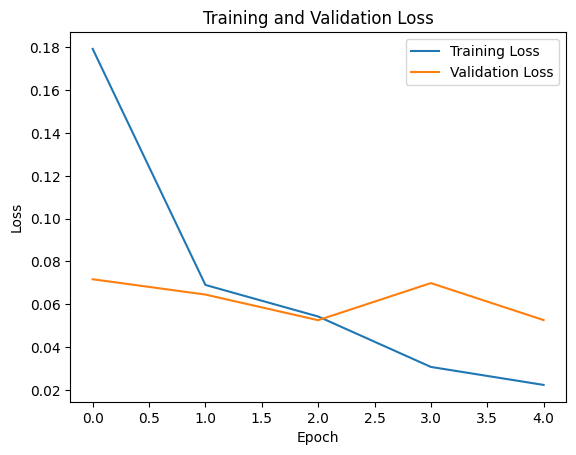

In [14]:
# Plot the confusion matrix
conf_matrixRNN = confusion_matrix(y_test, y_predRNN)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrixRNN, display_labels = ['True', 'Fake'])
disp.plot(cmap = 'Blues')
plt.title('Confusion Matrix for RNN')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()